#task1

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
'''
task_1(a)
Poisson probability distribution function
P_lambmda(k)=(lambda^k)*(e^-lambda)/(k!)
'''
def Poisson(p_lam,p_k):
    factorial = np.float64(1)
    for i in range(1,p_k+1):
        factorial = factorial * np.float(i)
    num1=np.float(p_lam**k)
    num2=np.float(np.exp(-p_lam))
    den=factorial
    P=np.float64(num1*num2/den)
    return P
for i in ((1,0),(5,10),(3,21),(2.6,40)):
    print(Poisson(i[0],i[1]))

0.36787944117144233
5.8024923865029996e-06
2.3679848323662548e-19
1.0815734522303218e-47


0.19138026385186324
0.10727518502119615
0.5194444382312415
0.8385936449746834
0.9810203530923385
0.33902795271661557
0.49376903047421106
0.5979706188213063
0.3605316531549825
0.2770716906888575
0.6495385295700862
0.6102666366357079
0.3701398321135416
0.09120344864666041
0.6200659693683481
0.32837467311300284
0.28494942488606423
0.5972157071179707
0.9897576139822837
0.8837878360439776
0.3879976862556411
0.41325071880792885
0.6558268827754201
0.16974161217528128
0.2593013785338152
0.6400345892286587
0.8428632093164179
0.7359276015015426
0.9150820681537253
0.8568492078903596
0.75934049767925
0.5740245170823168
0.9664562347854466
0.058168148786406526
0.3575190459383233
0.2956457793846483
0.40899293933418246
0.9853878572617947
0.05144799609620243
0.19478902178507917
0.4773894098096101
0.28410397001626997
0.4730772026903969
0.14621193041863023
0.8015794859744416
0.6704306764596994
0.7148897031609112
0.3524885569841314
0.6990595970634955
0.5415138674982618
0.5915155530196028
0.347903871674462

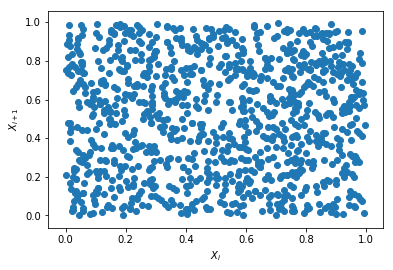

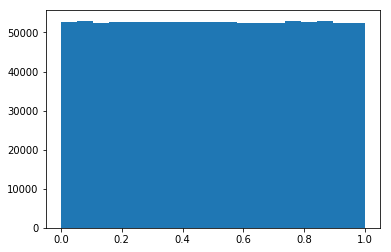

In [25]:
'''
task_1(b)
random number generator 

'''
seed=1337
def random_generator(seed, m=2**64, a=2349543, c=913842, a1=21, a2=35, a3=4, a4=4294957665):
    """
    Generates psuedorandom numbers with a combination of (M)LCC, 64 bit shift, and MWC
    :param seed: Seed to use
    :param m:
    :param a:
    :param c:
    :return:
    """

    # First linear congruential generator
    # While true, so the generator never stops making new numbers
    while True:
        # This is MLCC part
        generated_number = (a * seed + c) % m
        # Now bit shift
        generated_number = generated_number ^ (generated_number >> a1)
        generated_number = generated_number ^ (generated_number << a2)
        generated_number = generated_number ^ (generated_number >> a3)

        # Now MWC part
        mwc_out = a4 * (generated_number & (2 ** 32 - 1)) + (generated_number >> 32)

        seed = mwc_out
        # m = third_output
        mwc_out = mwc_out / m

        if mwc_out >= 1.:
            # Have to make it between 1 and 0, so mod 1. makes sure its between 0 and 1 now
            close_to_final = mwc_out % 1.
        else:
            close_to_final = mwc_out

        yield close_to_final


rand_gen = random_generator(seed)

first_thousand = []
first_thousand_x_1 = [0.0]
# 1b first one
for i in range(1000):
    first_thousand.append(next(rand_gen))
    print(first_thousand[i])
    if i > 0:
        first_thousand_x_1.append(first_thousand[i - 1])

# Now plot xi+1 vs xi

plt.scatter(first_thousand, first_thousand_x_1)
# plt.scatter([i for i in range(1000)], first_thousand_x_1)
plt.xlabel("$X_i$")
plt.ylabel("$X_{i+1}$")
plt.show()

first_million = []
for i in range(1000000):
    first_million.append(next(rand_gen))

plt.hist(first_million, bins=np.linspace(0.0, 1.0, 20))
plt.show()
